**Импорт библиотек**



In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **1**

Dataset “Airport” (используйте переменные Scheduled departures, Performed departures, Enplaned passengers, Enplaned revenue tons of freight, Enplaned revenue tons of mail): постройте гистограммы для каждой изучаемой переменной и ящики с усами. Сделайте предположение о виде распределения (по каждой переменной), объясните полученные значения в ящике с усами. Рассчитайте числовые характеристики этих переменных, описательную статистику (выборочное среднее, выборочная дисперсия, стандартное отклонение, медиана, 1-й и 3-й квартили, попарные коэффициенты корреляции между переменными).

In [ ]:
data1 = pd.read_csv(r"C:\Users\user\Downloads\deepseek_csv_20251018_9c42e5.txt",sep=',')
data1.columns = ['Airport','City','Scheduled departures','Performed departures', 'Enplaned passengers', 'Enplaned revenue tons of freight', 'Enplaned revenue tons of mail']

In [ ]:
data1.head()

,Airport,City,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
0,HARTSFIELD INTL,ATLANTA,285693,288803,22665665,165668.76,93039.48
1,BALTO/WASH INTL,BALTIMORE,73300,74048,4420425,18041.52,19722.93
2,LOGAN INTL,BOSTON,114153,115524,9549585,127815.09,29785.72
3,DOUGLAS MUNI,CHARLOTTE,120210,121798,7076954,36242.84,15399.46
4,OHARE INTL,CHICAGO,322430,332338,25636383,300463.80,140359.38


Гистограммы и боксплоты численных признаков

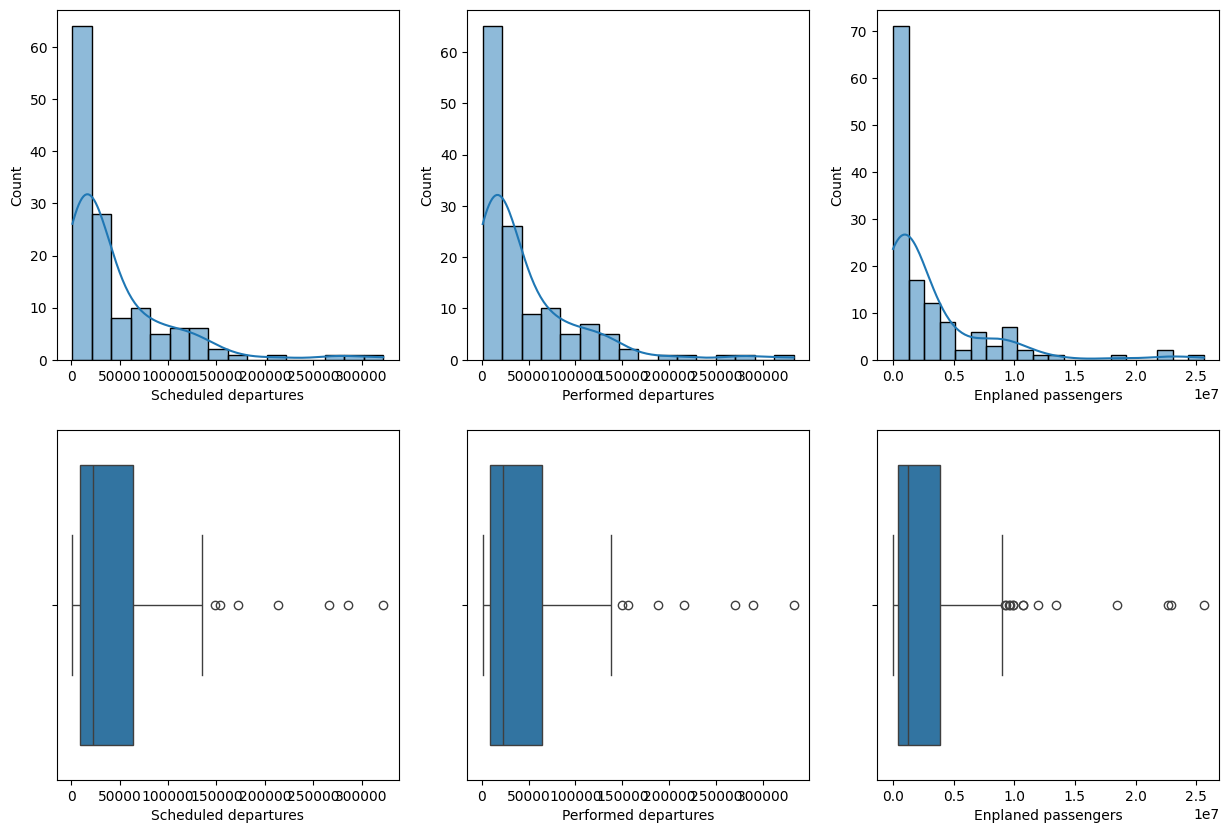

In [ ]:
cat = ['Airport','City']
num = ['Scheduled departures','Performed departures','Enplaned passengers','Enplaned revenue tons of freight',	'Enplaned revenue tons of mail']
fig,axes = plt.subplots(2,3,figsize=[15,10])
for i,col in enumerate(num[:3]):
  k = i%3
  sns.histplot(data=data1,x=col,ax=axes[0][k],kde=True)
  sns.boxplot(data=data1,x=col,ax=axes[1][k])


Предположения: Логнормальные распределения

На боксплоте медиана меньше среднего, узковатый график, медиана не вплотную к Q1, что подсказывает скорее логнормальное, чем экспоненциальное распределение.

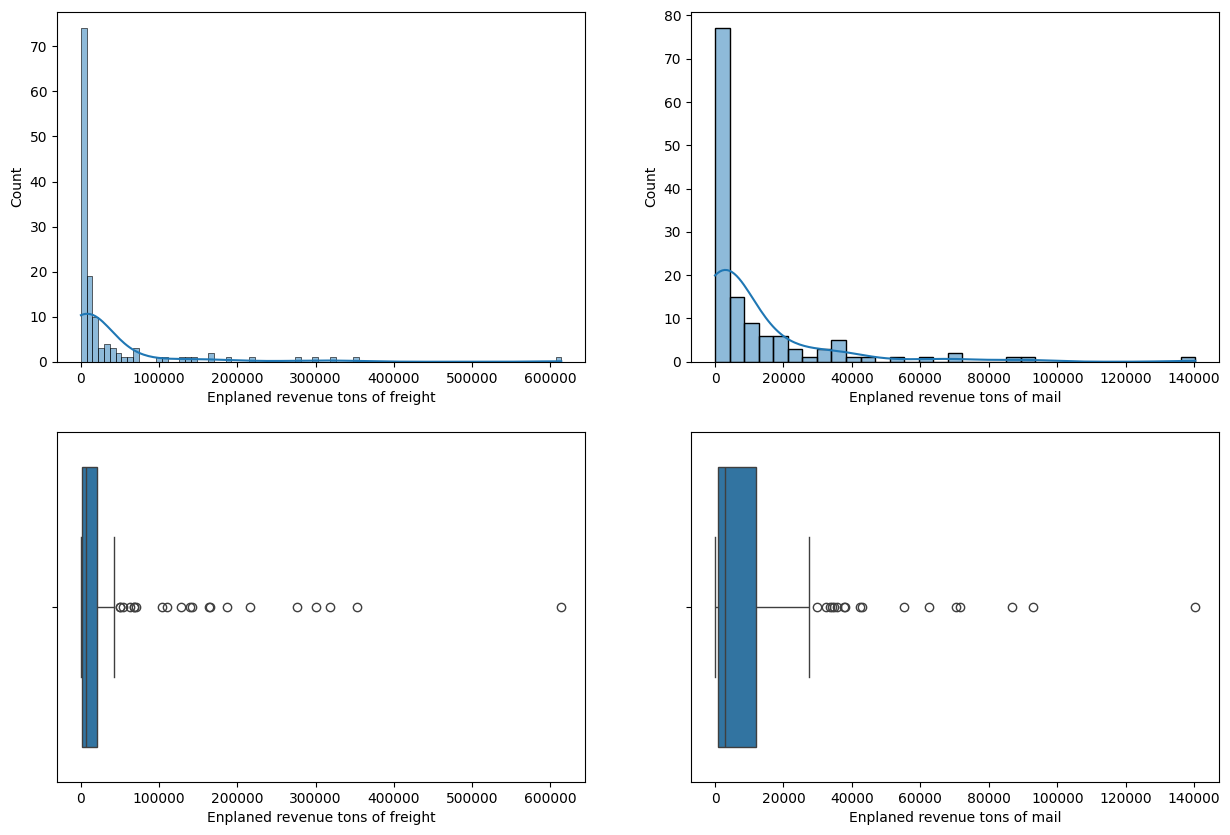

In [12]:
fig,axes = plt.subplots(2,2,figsize=[15,10])
for i,col in enumerate(num[3:5]):
  k = i%2
  sns.histplot(data=data1,x=col,ax=axes[0][k],kde=True)
  sns.boxplot(data=data1,x=col,ax=axes[1][k])

Также думаю, что логнормальное распределение

Числовые характеристики

In [13]:
results = {}
for i, col in enumerate(num):
    results[col] = {'Mean': data1[col].mean(),
                     'Median': data1[col].median(),
                     'Mode':data1[col].mode().iloc[0],
                     'Var':data1[col].var(),
                     'Range':data1[col].max() - data1[col].min(),
                     'Std':data1[col].std(),
                     'IQR':data1[col].quantile(0.75) - data1[col].quantile(0.25),
                     'Skewness':data1[col].skew(),
                     'Kurtosis':data1[col].kurtosis()}
pd.DataFrame(results).T


,Mean,Median,Mode,Var,Range,Std,IQR,Skewness,Kurtosis
Scheduled departures,4.556243e+04,22864.500,1188.00,3.202941e+09,321242.00,5.659453e+04,5.459475e+04,2.438093,7.248603
Performed departures,4.630496e+04,23027.500,1253.00,3.331109e+09,331085.00,5.771576e+04,5.500175e+04,2.457178,7.365763
Enplaned passengers,3.136192e+06,1210722.000,0.00,2.120272e+13,25636383.00,4.604642e+06,3.441284e+06,2.668803,8.348213
Enplaned revenue tons of freight,3.385816e+04,6195.270,7.95,6.575905e+09,614215.65,8.109195e+04,1.901879e+04,4.293489,22.687686
Enplaned revenue tons of mail,1.146187e+04,2919.535,0.00,4.234915e+08,140359.38,2.057891e+04,1.109114e+04,3.363530,14.181081


In [ ]:
data1[num].corr()

,Scheduled departures,Performed departures,Enplaned passengers,Enplaned revenue tons of freight,Enplaned revenue tons of mail
Scheduled departures,1.000000,0.999690,0.985058,0.593228,0.898682
Performed departures,0.999690,1.000000,0.984522,0.593499,0.899414
Enplaned passengers,0.985058,0.984522,1.000000,0.581516,0.912898
Enplaned revenue tons of freight,0.593228,0.593499,0.581516,1.000000,0.667230
Enplaned revenue tons of mail,0.898682,0.899414,0.912898,0.667230,1.000000


# **2**

2.Dataset “babyboom” (Birth weight in grams, Number of minutes after midnight of each birth): постройте гистограммы для каждой изучаемой переменной и ящики с усами. Сделайте предположение о виде распределения (по каждой переменной), объясните полученные значения в ящике с усами. Рассчитайте числовые характеристики этих переменных, описательную статистику (выборочное среднее, выборочная дисперсия, стандартное отклонение, медиана, 1-й и 3-й квартили, попарные коэффициенты корреляции между переменными).

In [ ]:
data2 = pd.read_csv(r'C:\Users\user\Downloads\deepseek_csv_20251029_429b07.txt')

In [ ]:
data2.head()

,Time of Birth,Sex,Birth Weight,minutes since midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


Гистограммы и boxplot

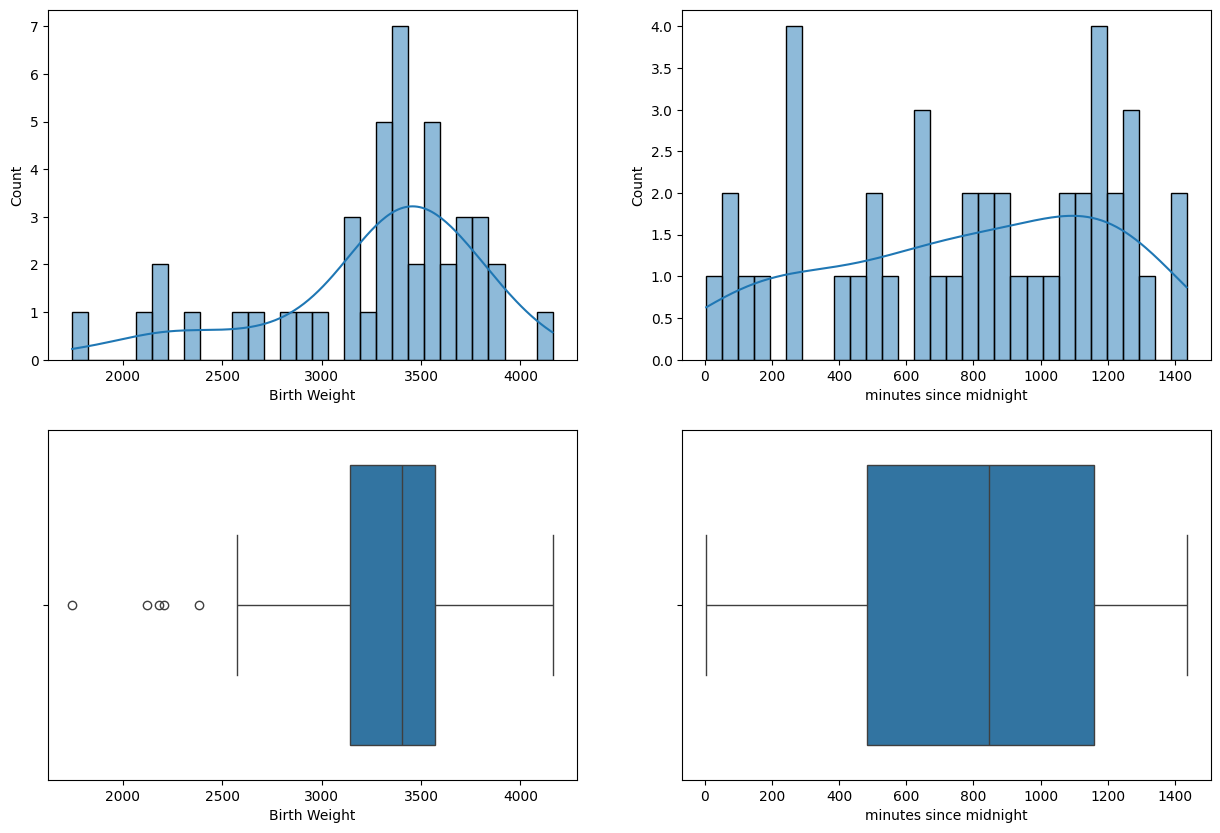

In [ ]:
num = ['Birth Weight','minutes since midnight']
fig,axes = plt.subplots(2,2,figsize=[15,10])
for i,col in enumerate(num[:2]):
  k = i%2
  sns.histplot(data=data2,x=col,ax=axes[0][k],kde=True, bins=30)
  sns.boxplot(data=data2,x=col,ax=axes[1][k])

Предположение о Birth Weight: нормальное усеченное или нормальное сдвинутое распределение

На boxplot видно, умеренная левосторонняя ассиметрия, медиана ближе к Q3 чем к Q1, небольшое количество выбросов слева

Предположение о minutes since midnight: Мультимодальное распределение - очень много пиков

boxplot в мультимодальном распределении говорит о симметрии модальностей - медиана близко к центру, примерно равные усы


Числовые характеристики

In [ ]:
results = {}
for i, col in enumerate(num):
    results[col] = {'Mean': data2[col].mean(),
                     'Median': data2[col].median(),
                     'Mode':data2[col].mode().iloc[0],
                     'Var':data2[col].var(),
                     'Range':data2[col].max() - data2[col].min(),
                     'Std':data2[col].std(),
                     'IQR':data2[col].quantile(0.75) - data2[col].quantile(0.25),
                     'Skewness':data2[col].skew(),
                     'Kurtosis':data2[col].kurtosis()}
pd.DataFrame(results).T


,Mean,Median,Mode,Var,Range,Std,IQR,Skewness,Kurtosis
Birth Weight,3275.954545,3404.0,3428.0,278818.276956,2417.0,528.032458,430.25,-1.156278,1.062852
minutes since midnight,788.727273,846.5,5.0,173111.691332,1430.0,416.066931,675.75,-0.329531,-1.078323


Корреляция

In [ ]:
data2[num].corr()

,Birth Weight,minutes since midnight
Birth Weight,1.000000,0.079616
minutes since midnight,0.079616,1.000000
